### This dataset is based on the pascal heart sound challenge, but this one has metadata as .csv file which helps us a lot


In [21]:
import numpy as np
import pandas as pd


### EDA

In [22]:
set_a=pd.read_csv(r"C:\Users\utfu\Downloads\Heart Sound Classification\set_a.csv")
set_b=pd.read_csv(r"C:\Users\utfu\Downloads\Heart Sound Classification\set_b.csv")
set_a.head


<bound method NDFrame.head of     dataset                             fname     label  sublabel
0         a  set_a/artifact__201012172012.wav  artifact       NaN
1         a  set_a/artifact__201105040918.wav  artifact       NaN
2         a  set_a/artifact__201105041959.wav  artifact       NaN
3         a  set_a/artifact__201105051017.wav  artifact       NaN
4         a  set_a/artifact__201105060108.wav  artifact       NaN
..      ...                               ...       ...       ...
171       a          set_a/__201108222241.wav       NaN       NaN
172       a          set_a/__201108222244.wav       NaN       NaN
173       a          set_a/__201108222247.wav       NaN       NaN
174       a          set_a/__201108222254.wav       NaN       NaN
175       a          set_a/__201108222257.wav       NaN       NaN

[176 rows x 4 columns]>

In [23]:
set_b.head

<bound method NDFrame.head of     dataset                                              fname       label  \
0         b  set_b/Btraining_extrastole_127_1306764300147_C...  extrastole   
1         b  set_b/Btraining_extrastole_128_1306344005749_A...  extrastole   
2         b  set_b/Btraining_extrastole_130_1306347376079_D...  extrastole   
3         b  set_b/Btraining_extrastole_134_1306428161797_C...  extrastole   
4         b  set_b/Btraining_extrastole_138_1306762146980_B...  extrastole   
..      ...                                                ...         ...   
651       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
652       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
653       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
654       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
655       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   

        sublabel  
0            N

Set A

In [24]:
temp=set_a["label"].value_counts(dropna=False)
print(temp)
temp1=np.array(("null","artifact","murmur","normal","extrahls"))

NaN         52
artifact    40
murmur      34
normal      31
extrahls    19
Name: label, dtype: int64


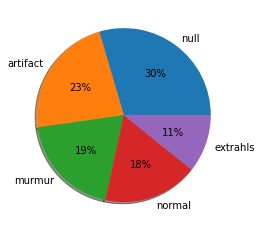

In [25]:
import matplotlib.pyplot as plt
seta_labels= np.array(temp)
plt.figure(facecolor='white')
plt.pie(seta_labels, labels=temp1, shadow=True, autopct = '%.0f%%')
plt.show()


Set B

In [26]:
temp2=set_b["label"].value_counts(dropna=False)

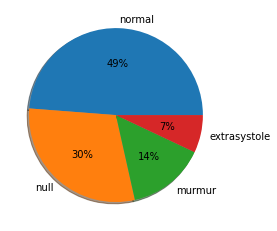

In [27]:
import matplotlib.pyplot as plt
setb_labels= np.array(temp2)
plt.figure(facecolor='white')
plt.pie(setb_labels, labels=("normal","null","murmur","extrasystole"), shadow=True, autopct = '%.0f%%')
plt.show()

Set A and B Combined

In [28]:
set_ab= [set_a,set_b]
set_ab=pd.concat(set_ab)
set_ab

dataset                                              fname     label  \
0         a                   set_a/artifact__201012172012.wav  artifact   
1         a                   set_a/artifact__201105040918.wav  artifact   
2         a                   set_a/artifact__201105041959.wav  artifact   
3         a                   set_a/artifact__201105051017.wav  artifact   
4         a                   set_a/artifact__201105060108.wav  artifact   
..      ...                                                ...       ...   
651       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
652       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
653       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
654       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
655       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   

        sublabel  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
..           ...  
651  noisynormal  
652  noisynormal  
653  noisynormal  
654  noisynormal  
655  noisynormal  

[832 rows x 4 columns]

In [29]:
temp3=set_ab["label"].value_counts(dropna=False)
print(temp3)

normal        351
NaN           247
murmur        129
extrastole     46
artifact       40
extrahls       19
Name: label, dtype: int64


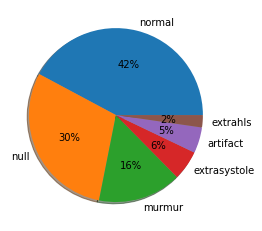

In [30]:
setab_labels= np.array(temp3)
plt.figure(facecolor='white')
plt.pie(setab_labels, labels=("normal","null","murmur","extrasystole","artifact","extrahls"), shadow=True, autopct = '%.0f%%')
plt.show()

In [31]:
set_ab.isnull().sum()

dataset       0
fname         0
label       247
sublabel    683
dtype: int64

### Now, we put test data as the unlabelled set of data, or we could directly drop the null label values.

test data being unlabelled data

In [32]:
#test_ab= set_ab[set_ab['label'].isnull()]
#test_ab.shape

dropna

In [33]:
set_ab=set_ab.dropna(subset=['label'])
set_ab.shape

(585, 4)

dropping sublabel and dataset label cuz they useless!!!!!

In [34]:
train_data= set_ab.drop(["sublabel","dataset"],axis="columns")
train_data

fname     label
0                     set_a/artifact__201012172012.wav  artifact
1                     set_a/artifact__201105040918.wav  artifact
2                     set_a/artifact__201105041959.wav  artifact
3                     set_a/artifact__201105051017.wav  artifact
4                     set_a/artifact__201105060108.wav  artifact
..                                                 ...       ...
651  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
652  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
653  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
654  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
655  set_b/Btraining_normal_Btraining_noisynormal_2...    normal

[585 rows x 2 columns]

In [35]:
train_data=train_data.reset_index()
train_data.isnull().sum()

index    0
fname    0
label    0
dtype: int64

In [36]:

train_data

index                                              fname     label
0        0                   set_a/artifact__201012172012.wav  artifact
1        1                   set_a/artifact__201105040918.wav  artifact
2        2                   set_a/artifact__201105041959.wav  artifact
3        3                   set_a/artifact__201105051017.wav  artifact
4        4                   set_a/artifact__201105060108.wav  artifact
..     ...                                                ...       ...
580    651  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
581    652  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
582    653  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
583    654  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
584    655  set_b/Btraining_normal_Btraining_noisynormal_2...    normal

[585 rows x 3 columns]

creating a dataframe of audio files and their category

In [37]:
df_path=[]
df_classes=[]
for path_number in range(len(train_data)):
    path_name=  str(train_data["fname"][path_number])
    df_path.append(path_name)
    df_classes.append(train_data["label"][path_number])

In [38]:
df_path = pd.Series(df_path,name="WAV").astype(str)
df_classes = pd.Series(df_classes,name="CATEGORY")
df=pd.concat([df_path,df_classes], axis=1)

 edited path name
 

In [39]:
from re import search
for ind,i in enumerate(df.WAV):
    if search("Btraining",i):
        i=i.replace("Btraining_","")
    if ind<=435 and ind>123:
        i=i.replace("normal_","normal__")
        i=i.replace("extrastole_","extrastole__")
        i=i.replace("murmur_","murmur__")
    df.iloc[ind]["WAV"]=i

making data of each category

In [40]:
normal_data = df[df['CATEGORY']=="normal"].reset_index()
normal_data.drop("index",axis="columns",inplace=True)

artifact_data = df[df['CATEGORY']=="artifact"].reset_index()
artifact_data.drop("index",axis="columns",inplace=True)

murmur_data = df[df['CATEGORY']=="murmur"].reset_index()
murmur_data.drop("index",axis="columns",inplace=True)

extrastole_data = df[df['CATEGORY']=="extrastole"].reset_index()
extrastole_data.drop("index",axis="columns",inplace=True)

extrahls_data = df[df['CATEGORY']=="extrahls"].reset_index()
extrahls_data.drop("index",axis="columns",inplace=True)

full_table=pd.concat([normal_data,artifact_data,murmur_data,extrastole_data,extrahls_data])
full_table.to_csv("xd.csv")
full_table

WAV  CATEGORY
0     set_a/normal__201101070538.wav    normal
1     set_a/normal__201101151127.wav    normal
2     set_a/normal__201102081152.wav    normal
3     set_a/normal__201102081321.wav    normal
4     set_a/normal__201102201230.wav    normal
..                               ...       ...
14  set_a/extrahls__201103200218.wav  extrahls
15  set_a/extrahls__201104021355.wav  extrahls
16  set_a/extrahls__201104140118.wav  extrahls
17  set_a/extrahls__201104270458.wav  extrahls
18  set_a/extrahls__201104270459.wav  extrahls

[585 rows x 2 columns]

In [41]:
x=df.groupby("CATEGORY")["CATEGORY"].count()
x

CATEGORY
artifact       40
extrahls       19
extrastole     46
murmur        129
normal        351
Name: CATEGORY, dtype: int64

([<matplotlib.patches.Wedge at 0x27cafe520d0>,
 [Text(1.0747186590158246, 0.23447772594263216, 'artifact'),
  Text(0.9481666186074488, 0.5576558646320479, 'extrahls'),
  Text(0.7002556238986901, 0.8483171937419732, 'extrastole'),
  Text(-0.27184207642361885, 1.0658808026630817, 'murmur'),
  Text(-0.3399185517867208, -1.0461622140716127, 'normal')],
 [Text(0.5862101776449952, 0.1278969414232539, '7%'),
  Text(0.5171817919676993, 0.30417592616293515, '3%'),
  Text(0.3819576130356491, 0.4627184693138035, '8%'),
  Text(-0.14827749623106481, 0.5813895287253172, '22%'),
  Text(-0.18541011915639313, -0.5706339349481523, '60%')])

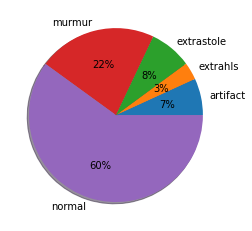

In [42]:
labels = ['artifact', 'extrahls', 'extrastole', 'murmur', 'normal']
plt.pie(x, labels=labels  ,shadow=True, autopct = '%.0f%%')

In [43]:
from IPython.display import Audio
import IPython.display as ipd
import librosa
import librosa.display

random audio file

playsound function


In [44]:
def playing_function(sound_address):
    sample_sound, sample_rate = librosa.load(sound_address)
    sample_audio = ipd.Audio(sample_sound, rate=sample_rate)

    return sample_audio

waveplot function

In [45]:
def waveplot_function(sound_address):
    figure = plt.figure(figsize=(14,6))
    
    sample_sound, sample_rate = librosa.load(sound_address)    
    librosa.display.waveshow(sample_sound,sr=sample_rate)

spectrum

In [46]:
def spectrum(sound_address):
    sample_sound, sample_rate = librosa.load(sound_address) 
    fft = np.fft.fft(sample_sound)
    magnitude = np.abs(fft)
    freq = np.linspace(0,sample_rate, len(magnitude)) 
    half_freq = freq[:int(len(freq)/2)]
    half_magnitude = magnitude[:int(len(freq)/2)]

    plt.figure(figsize=(12,8))
    plt.plot(half_freq,half_magnitude)
    plt.title("Spectrum")
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    plt.show()

spectrogram FOR CNN

In [47]:
"""import tensorflow as tf"""

'import tensorflow as tf'

In [48]:
"""random_audio=np.random.randint(0,len(full_table))

address=full_table.iloc[random_audio]["WAV"]
sound,sample_rate=librosa.load(address)
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

    # calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

spectrogram=tf.signal.stft(sound,frame_length=n_fft, frame_step=hop_length)
spectrogram=tf.abs(spectrogram)
spectrogram=tf.expand_dims(spectrogram, axis=2)
spectrogram"""


'random_audio=np.random.randint(0,len(full_table))\n\naddress=full_table.iloc[random_audio]["WAV"]\nsound,sample_rate=librosa.load(address)\nhop_length = 512 # in num. of samples\nn_fft = 2048 # window in num. of samples\n\n    # calculate duration hop length and window in seconds\nhop_length_duration = float(hop_length)/sample_rate\nn_fft_duration = float(n_fft)/sample_rate\n\nprint("STFT hop length duration is: {}s".format(hop_length_duration))\nprint("STFT window duration is: {}s".format(n_fft_duration))\n\nspectrogram=tf.signal.stft(sound,frame_length=n_fft, frame_step=hop_length)\nspectrogram=tf.abs(spectrogram)\nspectrogram=tf.expand_dims(spectrogram, axis=2)\nspectrogram'

In [49]:
"""import os
lengths=[]
for path_number in range(len(full_table)):
    path_name=  str(full_table.iloc[path_number]["WAV"])
    audio, sr2=librosa.load(path_name)
    lengths.append(len(audio))
lengths 
tf.math.reduce_mean(lengths)
150037/22050"""


'import os\nlengths=[]\nfor path_number in range(len(full_table)):\n    path_name=  str(full_table.iloc[path_number]["WAV"])\n    audio, sr2=librosa.load(path_name)\n    lengths.append(len(audio))\nlengths \ntf.math.reduce_mean(lengths)\n150037/22050'

In [50]:
def spectrogram(sound_address):
    
    sample_sound, sample_rate = librosa.load(sound_address)
    # STFT -> spectrogram
    hop_length = 512 # in num. of samples
    n_fft = 2048 # window in num. of samples

    # calculate duration hop length and window in seconds
    hop_length_duration = float(hop_length)/sample_rate
    n_fft_duration = float(n_fft)/sample_rate

    print("STFT hop length duration is: {}s".format(hop_length_duration))
    print("STFT window duration is: {}s".format(n_fft_duration))

    # perform stft
    stft = librosa.stft(sample_sound, n_fft=n_fft, hop_length=hop_length)

    # calculate abs values on complex numbers to get magnitude
    spectrogram = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(spectrogram)

    # display spectrogram
    plt.figure(figsize=(15,10))
    librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.colorbar()
    plt.title("Spectrogram")

mfccs

In [51]:
def MFCCS(sound_address):
    
    sample_sound, sample_rate = librosa.load(sound_address)
    hop_length = 512 # in num. of samples
    n_fft = 2048 # window in num. of samples
    # MFCCs
    # extract 25 MFCCs
    MFCCs = librosa.feature.mfcc(sample_sound, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

    # display MFCCs
    plt.figure(figsize=(15,10))
    librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
    plt.xlabel("Time")
    plt.ylabel("MFCC coefficients")
    plt.colorbar()
    plt.title("MFCCs")

    # show plots
    plt.show()

normal

In [52]:
random_normal=np.random.randint(0,len(normal_data))
normal_sound_address = normal_data.iloc[random_normal]["WAV"]

In [53]:
playing_function(normal_sound_address)


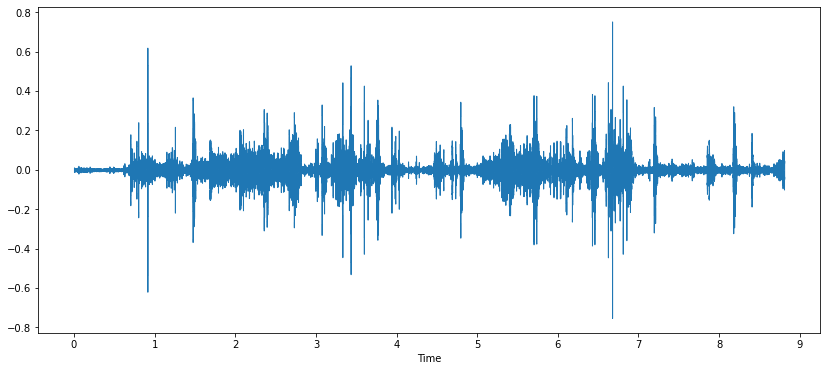

In [54]:
waveplot_function(normal_sound_address)

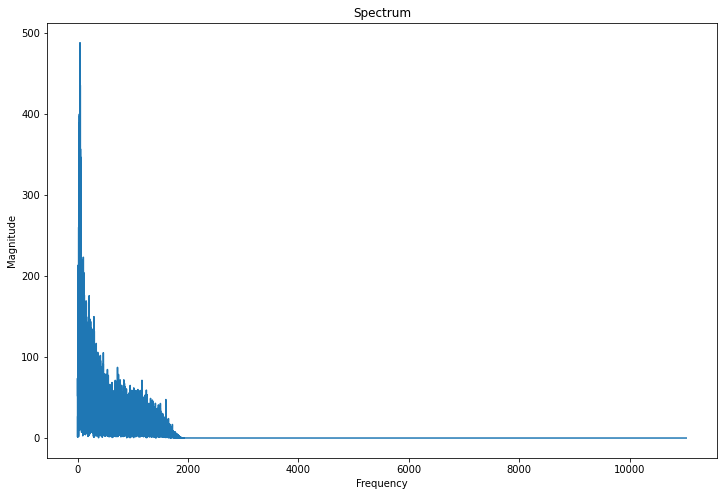

In [55]:
spectrum(normal_sound_address)

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


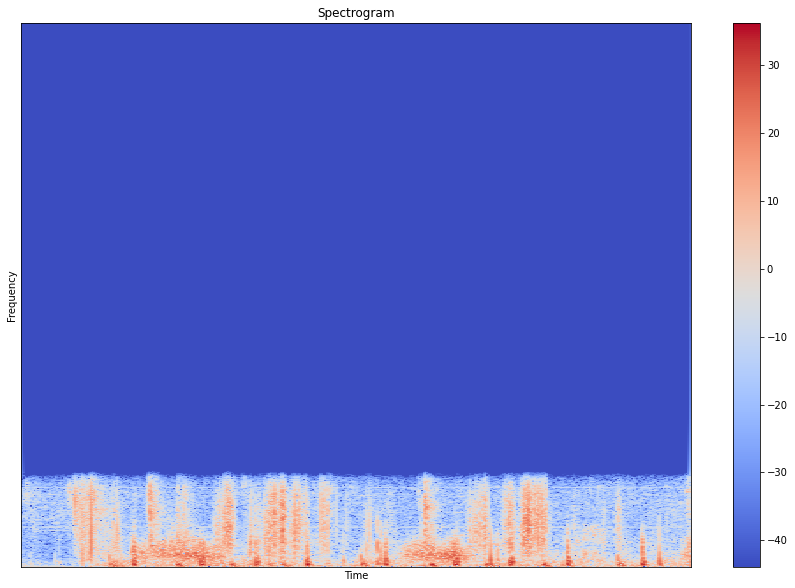

In [56]:
spectrogram(normal_sound_address)

C:\Users\utfu\AppData\Local\Temp\ipykernel_9952\2493310413.py:8: FutureWarning: Pass y=[-0.00805948 -0.00922991 -0.00996113 ... -0.03193124 -0.02107866
  0.        ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(sample_sound, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)


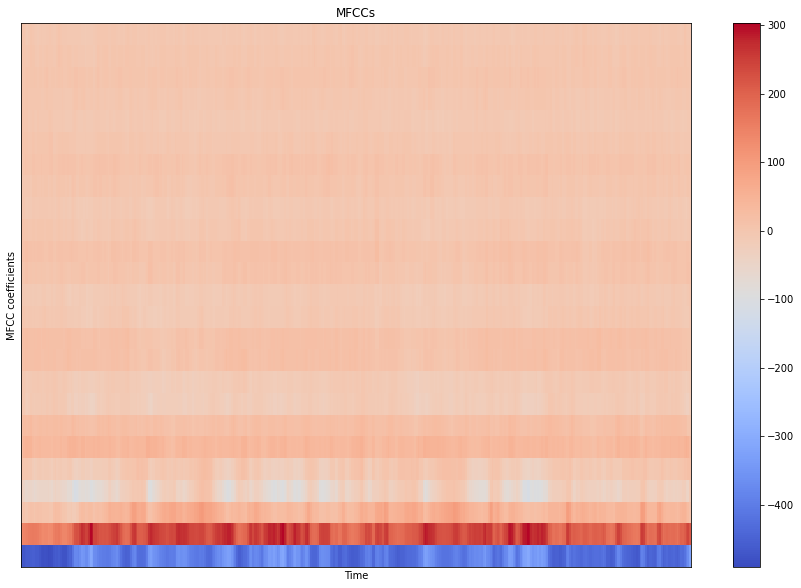

In [57]:
MFCCS(normal_sound_address)

murmur


In [58]:
random_murmur=np.random.randint(0,len(murmur_data))
murmur_sound_address = murmur_data.iloc[random_murmur]["WAV"]

In [59]:
playing_function(murmur_sound_address)

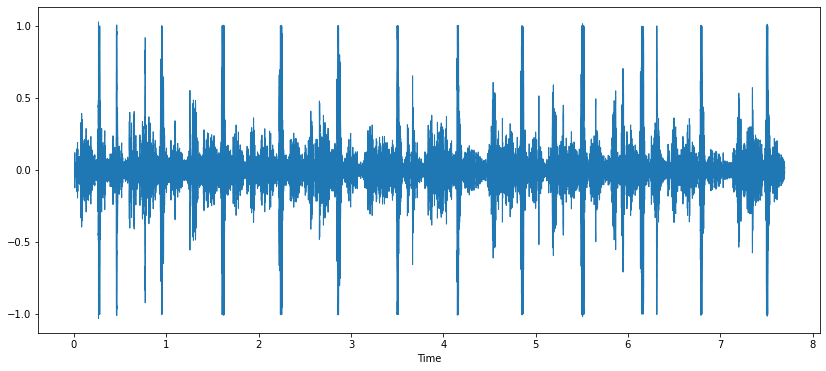

In [60]:
waveplot_function(murmur_sound_address)

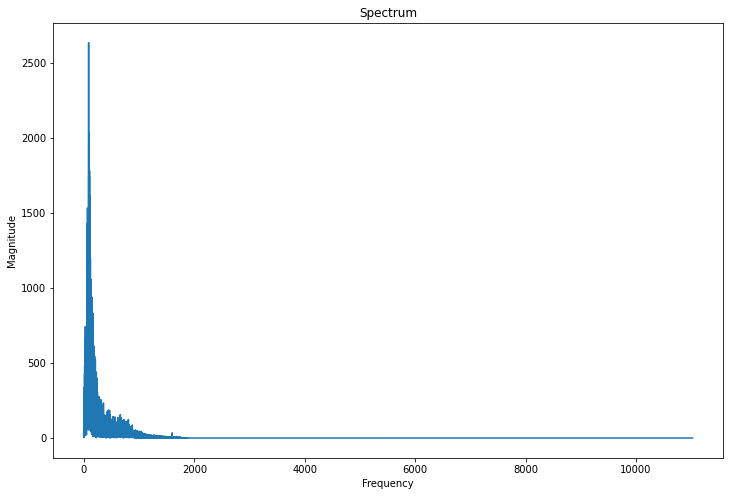

In [61]:
spectrum(murmur_sound_address)

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


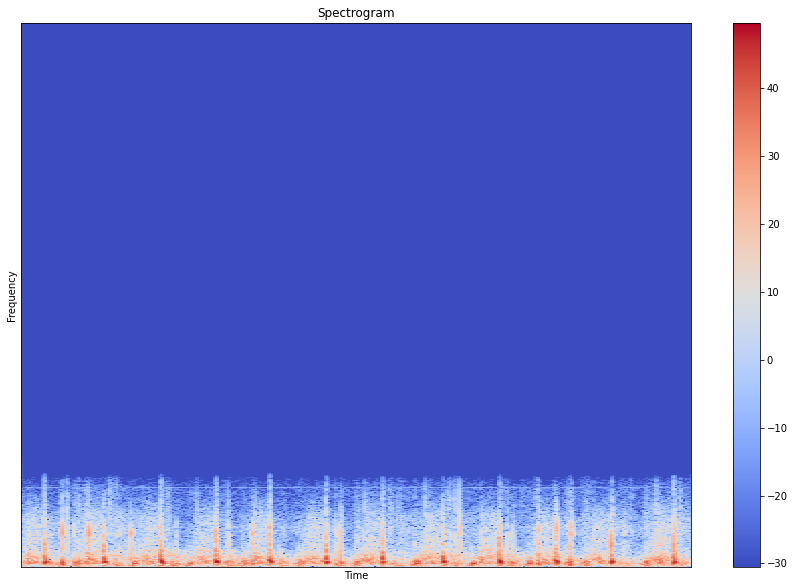

In [62]:
spectrogram(murmur_sound_address)

C:\Users\utfu\AppData\Local\Temp\ipykernel_9952\2493310413.py:8: FutureWarning: Pass y=[-0.02186229 -0.02706773 -0.03193082 ... -0.01106635 -0.00692688
  0.        ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(sample_sound, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)


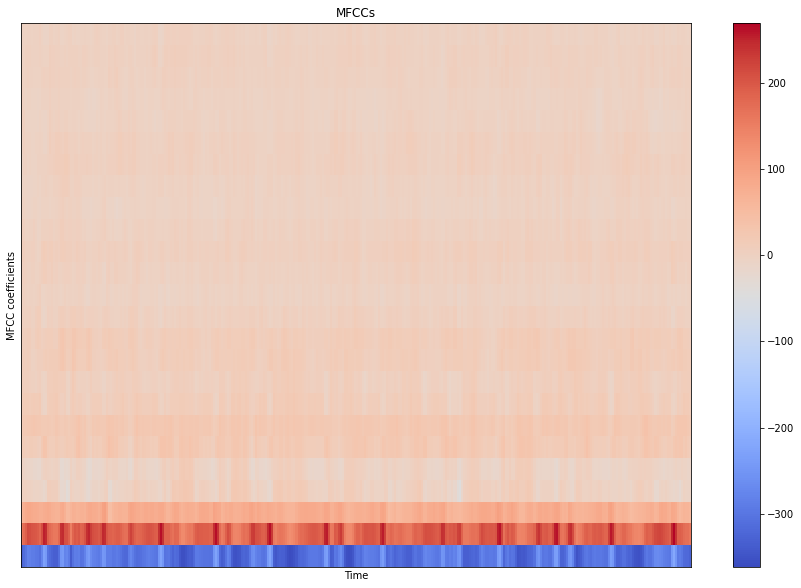

In [63]:
MFCCS(murmur_sound_address)

extrastole

In [64]:
random_extrastole=np.random.randint(0,len(extrastole_data))
extrastole_sound_address = extrastole_data.iloc[random_extrastole]["WAV"]

In [65]:
playing_function(extrastole_sound_address)

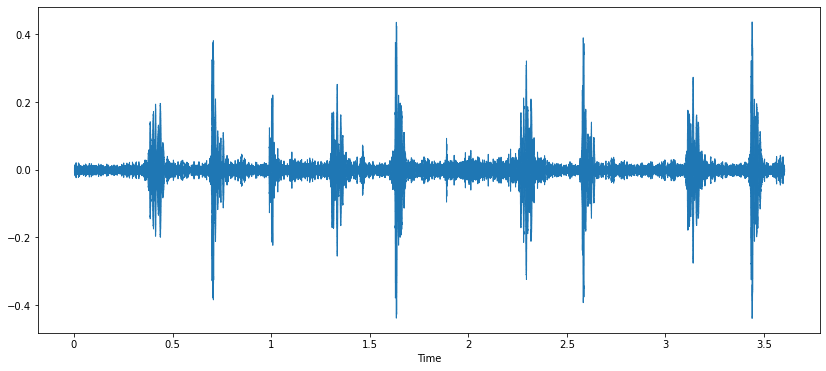

In [66]:
waveplot_function(extrastole_sound_address)

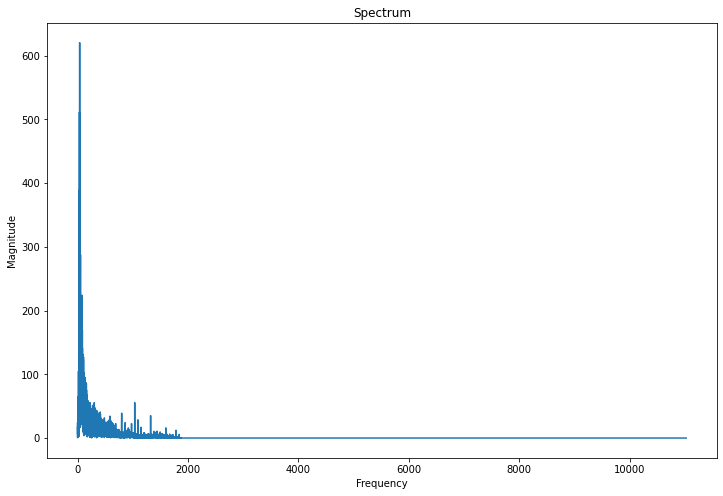

In [67]:

spectrum(extrastole_sound_address)

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


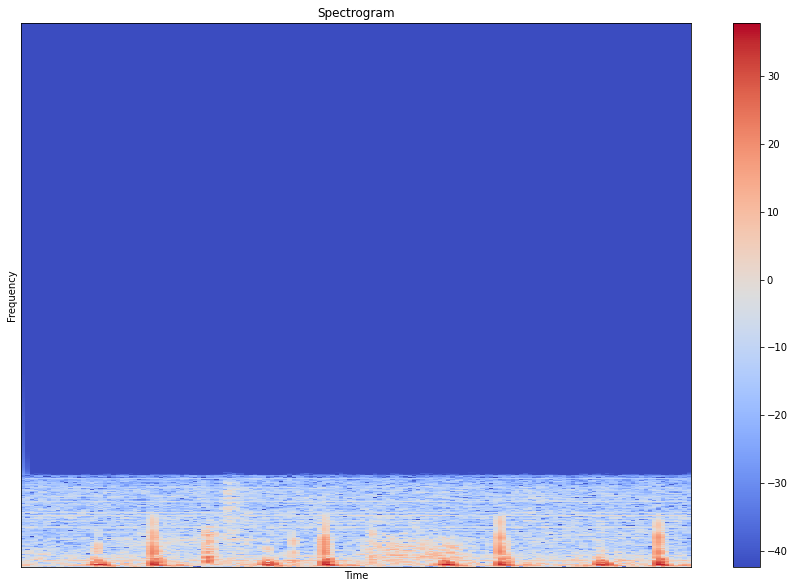

In [68]:
spectrogram(extrastole_sound_address)

C:\Users\utfu\AppData\Local\Temp\ipykernel_9952\2493310413.py:8: FutureWarning: Pass y=[ 0.00756255  0.00680329  0.00546846 ... -0.00061412 -0.00013315
  0.        ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(sample_sound, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)


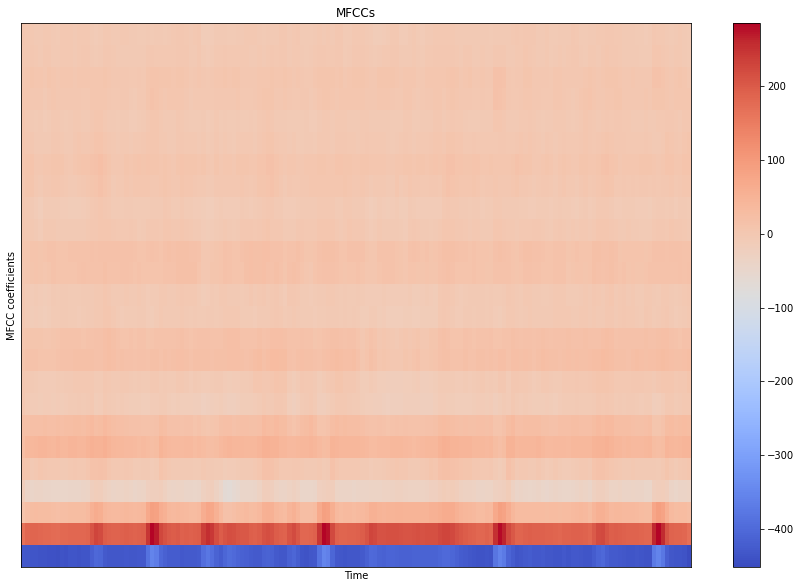

In [69]:
MFCCS(extrastole_sound_address)

artifact

In [70]:
random_artifact=np.random.randint(0,len(artifact_data))
artifact_sound_address = artifact_data.iloc[random_artifact]["WAV"]

In [71]:
playing_function(artifact_sound_address)

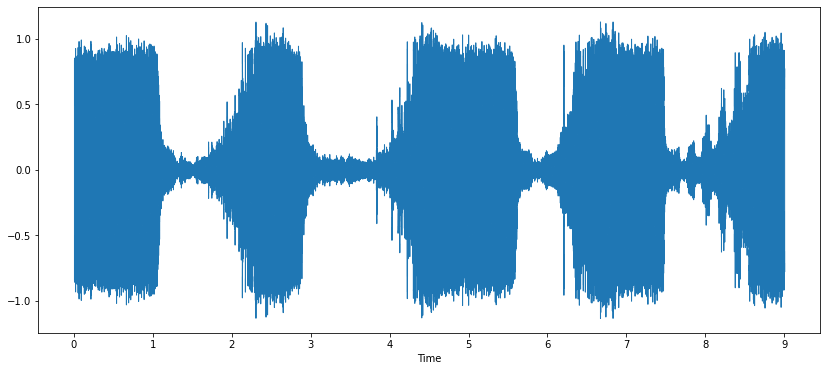

In [72]:
waveplot_function(artifact_sound_address)

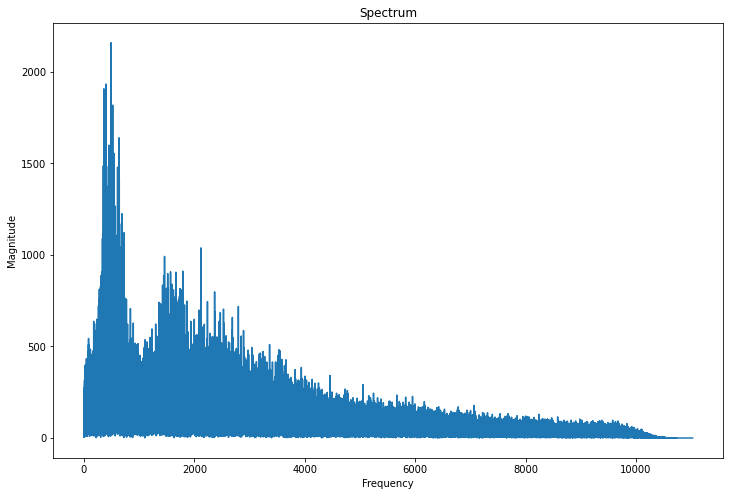

In [73]:
spectrum(artifact_sound_address)

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


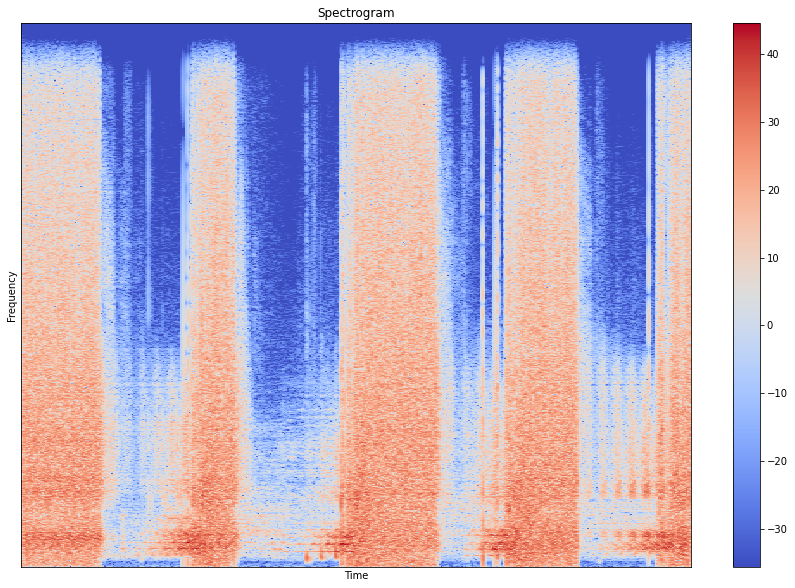

In [74]:
spectrogram(artifact_sound_address)

C:\Users\utfu\AppData\Local\Temp\ipykernel_9952\2493310413.py:8: FutureWarning: Pass y=[-0.37897974 -0.79952806 -0.75345093 ...  0.7758542   0.69299674
  0.2613753 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(sample_sound, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)


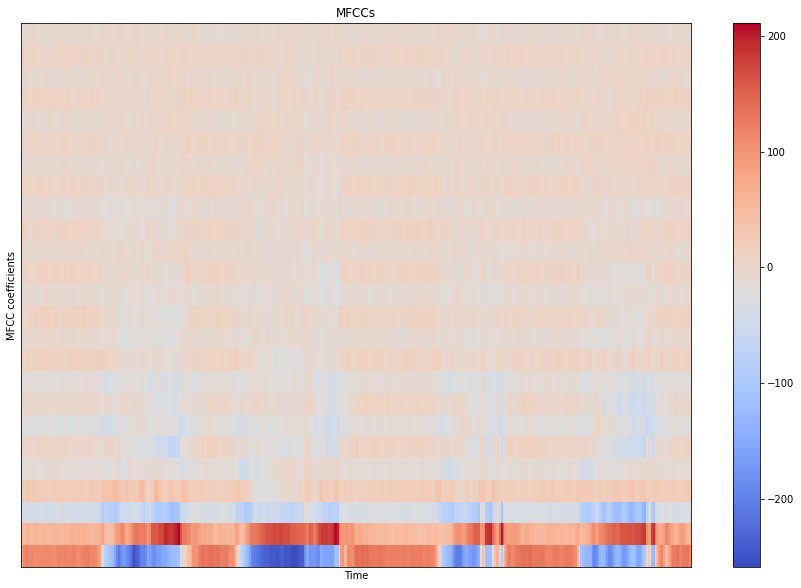

In [75]:
MFCCS(artifact_sound_address)

extrahls

In [76]:
random_extrahls=np.random.randint(0,len(extrahls_data))
extrahls_sound_address=extrahls_data.iloc[random_extrahls]["WAV"]

In [77]:
playing_function(extrahls_sound_address)

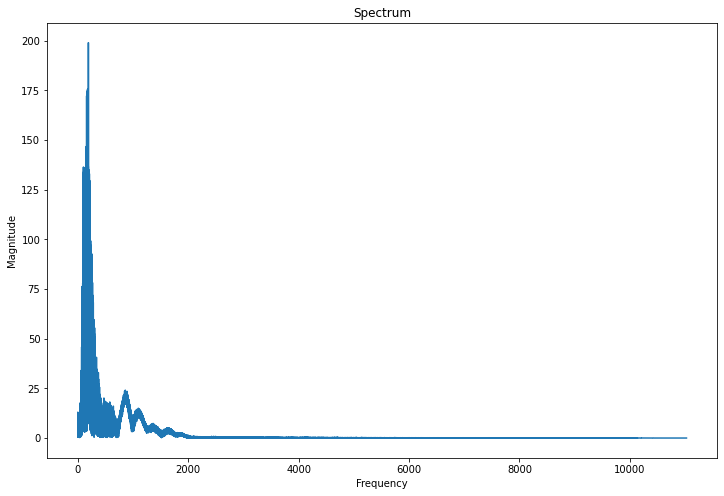

In [78]:
spectrum(extrahls_sound_address)

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


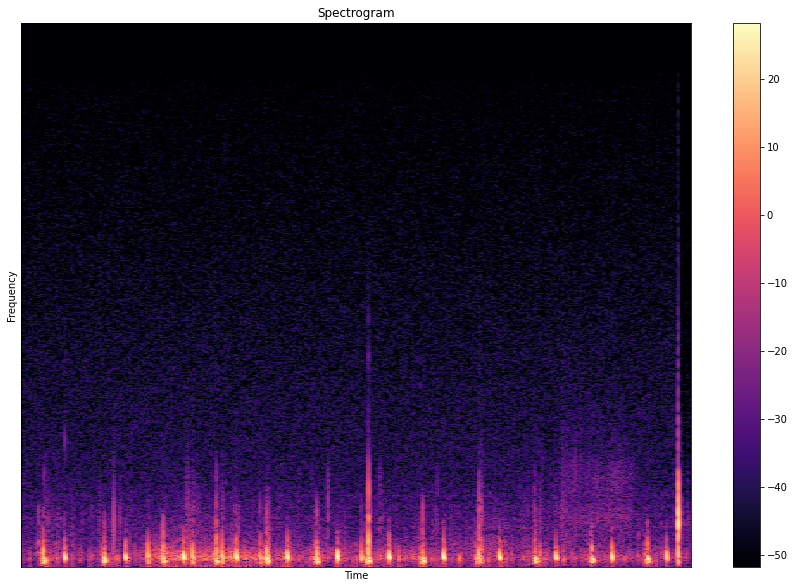

In [79]:
spectrogram(extrahls_sound_address)

C:\Users\utfu\AppData\Local\Temp\ipykernel_9952\2493310413.py:8: FutureWarning: Pass y=[-2.4044092e-04 -3.4074869e-04 -2.0483663e-05 ... -4.0383474e-04
 -3.2366568e-04  2.3732211e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(sample_sound, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)


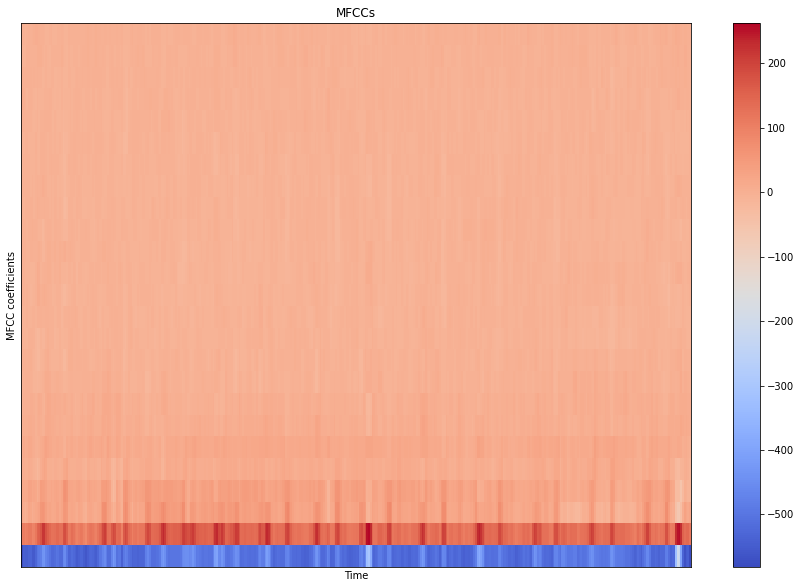

In [80]:
MFCCS(extrahls_sound_address)

Dataloading Function (to be altered)

In [81]:
def load_file_data (folder,file_names, duration=12, sr=22050):
    input_length=sr*duration
    # function to load files and extract features
    data = []    
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
            X, sr = librosa.load( sound_file, sr=sr, duration=duration) 
            dur = librosa.get_duration(y=X, sr=sr)
            # pad audio file same duration
            if (round(dur) < duration):
                print ("fixing audio lenght :", file_name)
                y = librosa.util.fix_length(X, input_length)                          
            # extract normalized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=100).T,axis=0)  
                     
        except Exception as e:
            print("Error encountered while parsing file: ", file_name)        
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data

In [82]:
# Encodeing the five types: 'artifact','murmur','normal'
# ('extrastole','extrahls') are murmurs
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Map label text to integer
CLASSES = ['artifact','murmur','normal']
NB_CLASSES=len(CLASSES)

# Map integer value to text labels
label_to_int = {k:v for v,k in enumerate(CLASSES)}
print (label_to_int)

int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)

{'artifact': 0, 'murmur': 1, 'normal': 2}
{0: 'artifact', 1: 'murmur', 2: 'normal'}


In [83]:
INPUT_DIR="C:\\Users\\utfu\\Downloads\\Heart Sound Classification"
MAX_SOUND_CLIP_DURATION=12

In [84]:
import os, fnmatch

A_folder=INPUT_DIR+'/set_a/'
# set-a
A_artifact_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'artifact*.wav')
A_artifact_sounds = load_file_data(folder=A_folder,file_names=A_artifact_files, duration=MAX_SOUND_CLIP_DURATION)
A_artifact_labels = [0 for items in A_artifact_files]

A_normal_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'normal*.wav')
A_normal_sounds = load_file_data(folder=A_folder,file_names=A_normal_files, duration=MAX_SOUND_CLIP_DURATION)
A_normal_labels = [2 for items in A_normal_sounds]

A_extrahls_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'extrahls*.wav')
A_extrahls_sounds = load_file_data(folder=A_folder,file_names=A_extrahls_files, duration=MAX_SOUND_CLIP_DURATION)
A_extrahls_labels = [1 for items in A_extrahls_sounds]

A_murmur_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'murmur*.wav')
A_murmur_sounds = load_file_data(folder=A_folder,file_names=A_murmur_files, duration=MAX_SOUND_CLIP_DURATION)
A_murmur_labels = [1 for items in A_murmur_files]


load file  C:\Users\utfu\Downloads\Heart Sound Classification/set_a/artifact__201012172012.wav
fixing audio lenght : artifact__201012172012.wav
load file  C:\Users\utfu\Downloads\Heart Sound Classification/set_a/artifact__201105040918.wav


C:\Users\utfu\AppData\Local\Temp\ipykernel_9952\3432038162.py:14: FutureWarning: Pass size=264600 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y = librosa.util.fix_length(X, input_length)


fixing audio lenght : artifact__201105040918.wav
load file  C:\Users\utfu\Downloads\Heart Sound Classification/set_a/artifact__201105041959.wav
fixing audio lenght : artifact__201105041959.wav
load file  C:\Users\utfu\Downloads\Heart Sound Classification/set_a/artifact__201105051017.wav
fixing audio lenght : artifact__201105051017.wav
load file  C:\Users\utfu\Downloads\Heart Sound Classification/set_a/artifact__201105060108.wav
fixing audio lenght : artifact__201105060108.wav
load file  C:\Users\utfu\Downloads\Heart Sound Classification/set_a/artifact__201105061143.wav
fixing audio lenght : artifact__201105061143.wav
load file  C:\Users\utfu\Downloads\Heart Sound Classification/set_a/artifact__201105190800.wav
fixing audio lenght : artifact__201105190800.wav
load file  C:\Users\utfu\Downloads\Heart Sound Classification/set_a/artifact__201105280851.wav
fixing audio lenght : artifact__201105280851.wav
load file  C:\Users\utfu\Downloads\Heart Sound Classification/set_a/artifact__201106010

In [85]:
B_folder=INPUT_DIR+'/set_b/'
# set-b
B_normal_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'normal*.wav')  # include noisy files
B_normal_sounds = load_file_data(folder=B_folder,file_names=B_normal_files, duration=MAX_SOUND_CLIP_DURATION)
B_normal_labels = [2 for items in B_normal_sounds]

B_murmur_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'murmur*.wav')  # include noisy files
B_murmur_sounds = load_file_data(folder=B_folder,file_names=B_murmur_files, duration=MAX_SOUND_CLIP_DURATION)
B_murmur_labels = [1 for items in B_murmur_files]

B_extrastole_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'extrastole*.wav')
B_extrastole_sounds = load_file_data(folder=B_folder,file_names=B_extrastole_files, duration=MAX_SOUND_CLIP_DURATION)
B_extrastole_labels = [1 for items in B_extrastole_files]

load file  C:\Users\utfu\Downloads\Heart Sound Classification/set_b/normal_noisynormal_101_1305030823364_B.wav
fixing audio lenght : normal_noisynormal_101_1305030823364_B.wav
load file  C:\Users\utfu\Downloads\Heart Sound Classification/set_b/normal_noisynormal_101_1305030823364_E.wav


C:\Users\utfu\AppData\Local\Temp\ipykernel_9952\3432038162.py:14: FutureWarning: Pass size=264600 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y = librosa.util.fix_length(X, input_length)


fixing audio lenght : normal_noisynormal_101_1305030823364_E.wav
load file  C:\Users\utfu\Downloads\Heart Sound Classification/set_b/normal_noisynormal_104_1305032492469_A.wav
fixing audio lenght : normal_noisynormal_104_1305032492469_A.wav
load file  C:\Users\utfu\Downloads\Heart Sound Classification/set_b/normal_noisynormal_105_1305033453095_A.wav
fixing audio lenght : normal_noisynormal_105_1305033453095_A.wav
load file  C:\Users\utfu\Downloads\Heart Sound Classification/set_b/normal_noisynormal_105_1305033453095_C.wav
fixing audio lenght : normal_noisynormal_105_1305033453095_C.wav
load file  C:\Users\utfu\Downloads\Heart Sound Classification/set_b/normal_noisynormal_106_1306776721273_A.wav
fixing audio lenght : normal_noisynormal_106_1306776721273_A.wav
load file  C:\Users\utfu\Downloads\Heart Sound Classification/set_b/normal_noisynormal_107_1305654946865_A.wav
fixing audio lenght : normal_noisynormal_107_1305654946865_A.wav
load file  C:\Users\utfu\Downloads\Heart Sound Classifi

In [86]:
x_data = np.concatenate((A_artifact_sounds, A_normal_sounds,A_extrahls_sounds,A_murmur_sounds, 
                         B_normal_sounds,B_murmur_sounds,B_extrastole_sounds))

y_data = np.concatenate((A_artifact_labels, A_normal_labels,A_extrahls_labels,A_murmur_labels,
                         B_normal_labels,B_murmur_labels,B_extrastole_labels))
print ("combined training data record: ",len(y_data))

combined training data record:  585


In [87]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.9, random_state=42, shuffle=True)

In [88]:
import tensorflow as tf

In [89]:
y_train = np.array(tf.keras.utils.to_categorical(y_train, len(CLASSES)))
y_test = np.array(tf.keras.utils.to_categorical(y_test, len(CLASSES)))

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, LSTM, Bidirectional, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [91]:
model = Sequential()

model.add(Bidirectional(LSTM(128, dropout=0.05 ,recurrent_dropout=0.20, return_sequences=True), input_shape = (100,1)))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))

model.add(Dense(128,activation='relu'))
model.add(Flatten())

model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 100, 256)         133120    
 l)                                                              
                                                                 
 dense (Dense)               (None, 100, 128)          32896     
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 dense_1 (Dense)             (None, 100, 128)          16512     
                                                                 
 dense_2 (Dense)             (None, 100, 128)          16512     
                                                                 
 dense_3 (Dense)             (None, 100, 128)          16512     
                                                        

In [92]:
MAX_PATIENT=12
MAX_EPOCHS=100
MAX_BATCH=32



print ("training started..... please wait.")
# training
history=model.fit(x_train, y_train, 
                  batch_size=MAX_BATCH, 
                  epochs=MAX_EPOCHS,
                  verbose=0) 

print ("training finised!")

training started..... please wait.
training finised!


In [93]:
score = model.evaluate(x_train, y_train, verbose=0) 
print ("model train data score       : ",round(score[1]*100) , "%")

score = model.evaluate(x_test, y_test, verbose=0) 
print ("model test data score        : ",round(score[1]*100) , "%")

model train data score       :  86 %
model test data score        :  68 %


In [94]:
y_pred = model.predict(x_test)

#check scores
scores = model.evaluate(x_test, y_test)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

2/2 [==============================] - 0s 40ms/step - loss: 0.7814 - acc: 0.6780
Model evaluation accuracy:  68 %


In [95]:
y_pred = np.asarray(model.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)

In [96]:
target_names = ["artifact", "murmur","normal"]
print(classification_report(y_test.argmax(axis=1), y_pred, target_names = target_names))

              precision    recall  f1-score   support

    artifact       0.80      1.00      0.89         4
      murmur       0.65      0.48      0.55        23
      normal       0.68      0.78      0.72        32

    accuracy                           0.68        59
   macro avg       0.71      0.75      0.72        59
weighted avg       0.67      0.68      0.67        59



no. of mfccs directly proportional to accuracy
